# Step 1:  Imports

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree, metrics

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LogisticRegression

# Step 2:  Load the Data

In [2]:
df = pd.read_csv('Suicide_Detection_Cleaned.csv')

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,class,clean,word,clean_text,length,sentiment,flesch_kincaid,repetition
0,0,0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.100000,24.4,0
1,1,1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.100000,8.4,0
2,2,2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally is almost over so i can never hear h...,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525000,6.4,0
3,3,3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5,0
4,4,4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,i am so losthello my name is adam and i have ...,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1281,-0.228461,74.7,2


In [4]:
df = df.dropna()

In [5]:
df['class'][df['class'] == 'suicide'] = 1
df['class'][df['class'] == 'non-suicide'] = 0

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/3149362354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][df['class'] == 'suicide'] = 1
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/3149362354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][df['class'] == 'non-suicide'] = 0


In [6]:
df['class'] = df['class'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232049 entries, 0 to 232048
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      232049 non-null  int64  
 1   Unnamed: 0.1    232049 non-null  int64  
 2   Unnamed: 0.1.1  232049 non-null  int64  
 3   text            232049 non-null  object 
 4   class           232049 non-null  int32  
 5   clean           232049 non-null  object 
 6   word            232049 non-null  object 
 7   clean_text      232049 non-null  object 
 8   length          232049 non-null  int64  
 9   sentiment       232049 non-null  float64
 10  flesch_kincaid  232049 non-null  float64
 11  repetition      232049 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 22.1+ MB


It looks like we have 232,052 rows of data and no columns are null.  With that we have no data to impute. 

# Step 3: Look at correlations

In the previous step we created variables for reading level, length, repetition and sentiment.  Are they measuring the same thing?

In [8]:
df1 = df[['length', 'sentiment', 'flesch_kincaid', 'repetition', 'class']]
df1.head()

,length,sentiment,flesch_kincaid,repetition,class
0,345,0.100000,24.4,0,1
1,69,0.100000,8.4,0,0
2,48,-0.525000,6.4,0,0
3,30,-0.291667,-1.5,0,1
4,1281,-0.228461,74.7,2,1


In [9]:
df1.corr()

,length,sentiment,flesch_kincaid,repetition,class
length,1.000000,-0.002195,0.885668,0.090969,0.093813
sentiment,-0.002195,1.000000,-0.000907,-0.000690,-0.098727
flesch_kincaid,0.885668,-0.000907,1.000000,0.022114,0.008996
repetition,0.090969,-0.000690,0.022114,1.000000,-0.013508
class,0.093813,-0.098727,0.008996,-0.013508,1.000000


We can see that reading level and length of post are highly correlated.  However since the correlation is less than 0.95, I think we can keep both variables.


# Naive Bayes with Count Vectorizer - Text Only

In [10]:
vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=12)

In [12]:
nbcv = MultinomialNB()
nbcv.fit(X_train1, y_train1)

MultinomialNB()

In [13]:
y_train_pred1 = nbcv.predict(X_train1)
y_pred1 = nbcv.predict(X_test1)

In [14]:
n_est = [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]
#n_est = [int(n) for n in np.logspace(start=0, stop=3, num=30)]
param_grid = {'alpha':n_est}
nbcv = MultinomialNB()
nbcv_cv= GridSearchCV(nbcv,param_grid,cv=5)
nbcv_cv.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2,
                                   5, 8]})

In [15]:
n_est

[0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]

In [16]:
print("Best Score:" + str(nbcv_cv.best_score_))
print("Best Parameters: " + str(nbcv_cv.best_params_))

Best Score:0.9113229505100977
Best Parameters: {'alpha': 0.1}


In [17]:
nbcv = MultinomialNB(alpha = 0.2)
nbcv.fit(X_train1, y_train1)

MultinomialNB(alpha=0.2)

In [18]:
y_train_pred1 = nbcv.predict(X_train1)
y_pred1 = nbcv.predict(X_test1)

In [19]:
training_accuracy_nbcv = nbcv.score(X_train1, y_train1)
test_accuracy_nbcv = nbcv.score(X_test1, y_test1)

In [20]:
print("Accuracy on training data: {:2f}".format(training_accuracy_nbcv))
print("Accuracy on test data:     {:2f}".format(test_accuracy_nbcv))

Accuracy on training data: 0.918362
Accuracy on test data:     0.912347


In [21]:
from sklearn import tree, metrics
accuracy_nbcv = metrics.accuracy_score(y_test1,y_pred1)
balanced_accuracy_nbcv = metrics.balanced_accuracy_score(y_test1,y_pred1)
precision_nbcv = metrics.precision_score(y_test1,y_pred1, pos_label = 1)
recall_nbcv = metrics.recall_score(y_test1,y_pred1, pos_label = 1)
f1_nbcv = metrics.f1_score(y_test1, y_pred1, pos_label = 1)
roc_auc_nbcv = metrics.roc_auc_score(y_test1, y_pred1)
print("Accuracy:", accuracy_nbcv)
print("Balanced accuracy:", balanced_accuracy_nbcv)
print('Precision score' , precision_nbcv)
print('Recall score' , recall_nbcv)
print('F1 score' , f1_nbcv)
print('ROC_AUC Score' , roc_auc_nbcv)

Accuracy: 0.9123472325168497
Balanced accuracy: 0.9124044626011576
Precision score 0.8801413472558258
Recall score 0.9544309041322885
F1 score 0.9157819771774954
ROC_AUC Score 0.9124044626011576


In [22]:
from sklearn.metrics import confusion_matrix
tn_nbcv, fp_nbcv, fn_nbcv, tp_nbcv = confusion_matrix(y_test1, y_pred1).ravel()
print(f'True Suicide: {tp_nbcv}')
print(f'False Suicide: {fp_nbcv}')
print(f'True Non-Suicide: {tn_nbcv}')
print(f'False Non-Suicide: {fn_nbcv}')

True Suicide: 27647
False Suicide: 3765
True Non-Suicide: 25281
False Non-Suicide: 1320


In [23]:
pd.DataFrame(confusion_matrix(y_test1, y_pred1), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,25281,3765
Actual Suicide,1320,27647


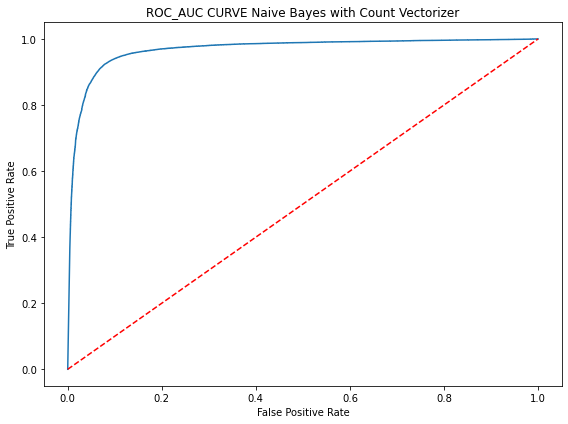

In [24]:
y_pred_proba1 = nbcv.predict_proba(X_test1)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test1,  y_pred_proba1)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr1,tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Naive Bayes with Count Vectorizer")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Naive Bayes with Count Vectorizer.png')

# Naive Bayes with Count Vectorizer - All Features

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)
scaled_features_df = pd.DataFrame(df_scaled, index=df1.index, columns=df1.columns)

In [26]:
scaled_features_df.head()

,length,sentiment,flesch_kincaid,repetition,class
0,0.000574,0.550000,0.000138,0.000000,1.0
1,0.000113,0.550000,0.000083,0.000000,0.0
2,0.000078,0.237500,0.000076,0.000000,0.0
3,0.000048,0.354167,0.000049,0.000000,1.0
4,0.002135,0.385769,0.000310,0.000257,1.0


In [27]:
scaled_features_df['length'].min()

0.0

In [28]:
#y = df[['SalePrice']]
try_this = scaled_features_df.drop(columns=['class'])

In [29]:
from scipy.sparse import hstack
vectorizer = CountVectorizer(min_df=3)
text_matrix = vectorizer.fit_transform(df['clean_text'])
text_matrix = text_matrix.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X = hstack((third, sentiment))

y = df['class']

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2777764568.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'][:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2777764568.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'][:, None]


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=12)

In [31]:
n_est = [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]
#n_est = [int(n) for n in np.logspace(start=0, stop=3, num=30)]
param_grid = {'alpha':n_est}
nbcv = MultinomialNB()
nbcv_cv= GridSearchCV(nbcv,param_grid,cv=5)
nbcv_cv.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2,
                                   5, 8]})

In [32]:
print("Best Score:" + str(nbcv_cv.best_score_))
print("Best Parameters: " + str(nbcv_cv.best_params_))

Best Score:0.9181835980178633
Best Parameters: {'alpha': 0.05}


In [33]:
nbcvi = MultinomialNB(alpha = 0.05)
nbcvi.fit(X_train2, y_train2)

MultinomialNB(alpha=0.05)

In [34]:
y_train_pred2 = nbcvi.predict(X_train2)
y_pred2 = nbcvi.predict(X_test2)

In [35]:
training_accuracy_nbcv = nbcvi.score(X_train2, y_train2)
test_accuracy_nbcv = nbcvi.score(X_test2, y_test2)

In [36]:
print("Accuracy on training data: {:2f}".format(training_accuracy_nbcv))
print("Accuracy on test data:     {:2f}".format(test_accuracy_nbcv))

Accuracy on training data: 0.926429
Accuracy on test data:     0.919863


In [37]:
accuracy_nbcvi = metrics.accuracy_score(y_test2,y_pred2)
balanced_accuracy_nbcvi = metrics.balanced_accuracy_score(y_test2,y_pred2)
precision_nbcvi = metrics.precision_score(y_test2,y_pred2, pos_label = 1)
recall_nbcvi = metrics.recall_score(y_test2,y_pred2, pos_label = 1)
f1_nbcvi = metrics.f1_score(y_test2, y_pred2, pos_label = 1)
roc_auc_nbcvi = metrics.roc_auc_score(y_test2, y_pred2)
print("Accuracy:", accuracy_nbcvi)
print("Balanced accuracy:", balanced_accuracy_nbcvi)
print('Precision score' , precision_nbcvi)
print('Recall score' , recall_nbcvi)
print('F1 score' , f1_nbcvi)
print('ROC_AUC Score' , roc_auc_nbcvi)

Accuracy: 0.9198627893747953
Balanced accuracy: 0.9198987194875261
Precision score 0.89860346184107
Recall score 0.9462837021438189
F1 score 0.9218274453094786
ROC_AUC Score 0.9198987194875261


In [38]:
from sklearn.metrics import confusion_matrix
tn_nbcvi, fp_nbcvi, fn_nbcvi, tp_nbcvi = confusion_matrix(y_test2, y_pred2).ravel()
print(f'True Suicide: {tp_nbcvi}')
print(f'False Suicide: {fp_nbcvi}')
print(f'True Non-Suicide: {tn_nbcvi}')
print(f'False Non-Suicide: {fn_nbcvi}')

True Suicide: 27411
False Suicide: 3093
True Non-Suicide: 25953
False Non-Suicide: 1556


In [39]:
pd.DataFrame(confusion_matrix(y_test2, y_pred2), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,25953,3093
Actual Suicide,1556,27411


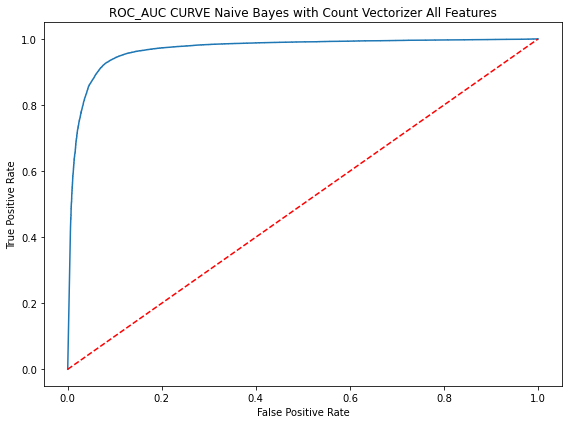

In [40]:
y_pred_proba2 = nbcvi.predict_proba(X_test2)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test2,  y_pred_proba2)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr2,tpr2)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Naive Bayes with Count Vectorizer All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Naive Bayes with Count Vectorizer All features.png')

# Nave Bayes with TF-IDF - Text Only

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
X_tfid1 = vectorizor_tfid.fit_transform(df['text'])
X_tfid1 = X_tfid1.tocsc() 
y_tfid1 = df['class']

In [42]:
X_tfid1

<232049x168114 sparse matrix of type '<class 'numpy.float64'>'
	with 16433728 stored elements in Compressed Sparse Column format>

In [43]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_tfid1, y_tfid1, test_size=0.25, random_state=12)

In [44]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train3, y_train3)

MultinomialNB()

In [45]:
n_est = [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]
#n_est = [int(n) for n in np.logspace(start=0, stop=3, num=30)]
param_grid = {'alpha':n_est}
nb_tfidf = MultinomialNB()
nb_tfidf_cv= GridSearchCV(nb_tfidf,param_grid,cv=5)
nb_tfidf_cv.fit(X_train3, y_train3)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2,
                                   5, 8]})

In [46]:
print("Best Score:" + str(nb_tfidf_cv.best_score_))
print("Best Parameters: " + str(nb_tfidf_cv.best_params_))

Best Score:0.9069100765895891
Best Parameters: {'alpha': 0.05}


In [47]:

nb_tfidf = MultinomialNB(alpha = 0.05)
nb_tfidf.fit(X_train3, y_train3)

MultinomialNB(alpha=0.05)

In [48]:
y_train_pred3 = nb_tfidf.predict(X_train3)
y_pred3 = nb_tfidf.predict(X_test3)

In [49]:
training_accuracy_nb_tfid = nb_tfidf.score(X_train3, y_train3)
test_accuracy_nb_tfid = nb_tfidf.score(X_test3, y_test3)

In [50]:
print("Accuracy on training data: {:2f}".format(training_accuracy_nb_tfid))
print("Accuracy on test data:     {:2f}".format(test_accuracy_nb_tfid))

Accuracy on training data: 0.931181
Accuracy on test data:     0.907124


In [51]:
from sklearn import tree, metrics
accuracy_nb_tfidf = metrics.accuracy_score(y_test3,y_pred3)
balanced_accuracy_nb_tfidf = metrics.balanced_accuracy_score(y_test3,y_pred3)
precision_nb_tfidf = metrics.precision_score(y_test3,y_pred3, pos_label = 1)
recall_nb_tfidf = metrics.recall_score(y_test3,y_pred3, pos_label = 1)
f1_nb_tfidf = metrics.f1_score(y_test3, y_pred3, pos_label = 1)
roc_auc_nb_tfidf = metrics.roc_auc_score(y_test3, y_pred3)
print("Accuracy:", accuracy_nb_tfidf)
print("Balanced accuracy:", balanced_accuracy_nb_tfidf)
print('Precision score' , precision_nb_tfidf)
print('Recall score' , recall_nb_tfidf)
print('F1 score' , f1_nb_tfidf)
print('ROC_AUC Score' , roc_auc_nb_tfidf)



Accuracy: 0.9071242652508921
Balanced accuracy: 0.9071876122247166
Precision score 0.8722255548890222
Recall score 0.953705941243484
F1 score 0.9111477572559367
ROC_AUC Score 0.9071876122247164


In [52]:
from sklearn.metrics import confusion_matrix
tn_nb_tfidf, fp_nb_tfidf, fn_nb_tfidf, tp_nb_tfidf = confusion_matrix(y_test3, y_pred3).ravel()
print(f'True Suicide: {tp_nb_tfidf}')
print(f'False Suicide: {fp_nb_tfidf}')
print(f'True Non-Suicide: {tn_nb_tfidf}')
print(f'False Non-Suicide: {fn_nb_tfidf}')

True Suicide: 27626
False Suicide: 4047
True Non-Suicide: 24999
False Non-Suicide: 1341


In [53]:
pd.DataFrame(confusion_matrix(y_test3, y_pred3), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,24999,4047
Actual Suicide,1341,27626


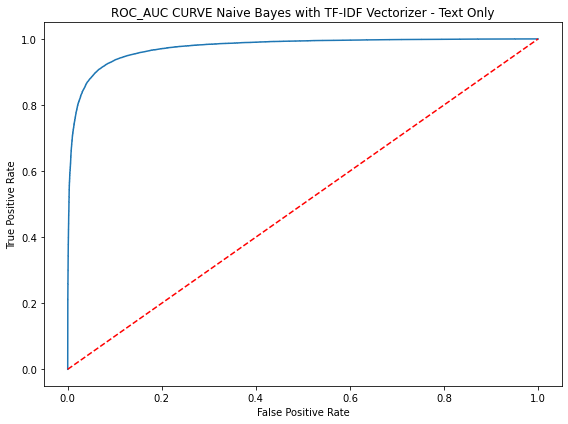

In [54]:
y_pred_proba3 = nb_tfidf.predict_proba(X_test3)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test3,  y_pred_proba3)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr3,tpr3)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Naive Bayes with TF-IDF Vectorizer - Text Only")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Naive Bayes with TF-IDF Vectoizer_Text_Only.png')

# Naive Bayes - TF-IDF - All Features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
text_matrix1 = vectorizor_tfid.fit_transform(df['text'])
text_matrix1 = text_matrix1.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix1, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X_tfid11 = hstack((third, sentiment))

y_tfid11 = df['class']

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/250637267.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'][:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/250637267.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'][:, None]


In [56]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_tfid11, y_tfid11, test_size=0.25, random_state=12)

In [57]:
n_est = [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]
#n_est = [int(n) for n in np.logspace(start=0, stop=3, num=30)]
param_grid = {'alpha':n_est}
nb_tfidf = MultinomialNB()
nb_tfidf_cv= GridSearchCV(nb_tfidf,param_grid,cv=5)
nb_tfidf_cv.fit(X_train4, y_train4)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2,
                                   5, 8]})

In [58]:
print("Best Score:" + str(nb_tfidf_cv.best_score_))
print("Best Parameters: " + str(nb_tfidf_cv.best_params_))

Best Score:0.909616417369875
Best Parameters: {'alpha': 0.05}


In [59]:
nb_tfidf = MultinomialNB(alpha = 0.05)
nb_tfidf.fit(X_train4, y_train4)

MultinomialNB(alpha=0.05)

In [60]:
y_train_pred4 = nb_tfidf.predict(X_train4)
y_pred4 = nb_tfidf.predict(X_test4)

In [61]:
training_accuracy_nb_tfid = nb_tfidf.score(X_train4, y_train4)
test_accuracy_nb_tfid = nb_tfidf.score(X_test4, y_test4)

In [62]:
print("Accuracy on training data: {:2f}".format(training_accuracy_nb_tfid))
print("Accuracy on test data:     {:2f}".format(test_accuracy_nb_tfid))

Accuracy on training data: 0.933755
Accuracy on test data:     0.910503


In [63]:
accuracy_nb_tfidfi = metrics.accuracy_score(y_test4,y_pred4)
balanced_accuracy_nb_tfidfi = metrics.balanced_accuracy_score(y_test4,y_pred4)
precision_nb_tfidfi = metrics.precision_score(y_test4,y_pred4, pos_label = 1)
recall_nb_tfidfi = metrics.recall_score(y_test4,y_pred4, pos_label = 1)
f1_nb_tfidfi = metrics.f1_score(y_test4, y_pred4, pos_label = 1)
roc_auc_nb_tfidfi = metrics.roc_auc_score(y_test4, y_pred4)
print("Accuracy:", accuracy_nb_tfidfi)
print("Balanced accuracy:", balanced_accuracy_nb_tfidfi)
print('Precision score' , precision_nb_tfidfi)
print('Recall score' , recall_nb_tfidfi)
print('F1 score' , f1_nb_tfidfi)
print('ROC_AUC Score' , roc_auc_nb_tfidfi)

Accuracy: 0.9105028183338217
Balanced accuracy: 0.9105574394429525
Precision score 0.879780198715696
Recall score 0.9506680015189699
F1 score 0.9138514634631979
ROC_AUC Score 0.9105574394429525


In [64]:
from sklearn.metrics import confusion_matrix
tn_nb_tfidfi, fp_nb_tfidfi, fn_nb_tfidfi, tp_nb_tfidfi = confusion_matrix(y_test4, y_pred4).ravel()
print(f'True Suicide: {tp_nb_tfidfi}')
print(f'False Suicide: {fp_nb_tfidfi}')
print(f'True Non-Suicide: {tn_nb_tfidfi}')
print(f'False Non-Suicide: {fn_nb_tfidfi}')

True Suicide: 27538
False Suicide: 3763
True Non-Suicide: 25283
False Non-Suicide: 1429


In [65]:
pd.DataFrame(confusion_matrix(y_test4, y_pred4), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,25283,3763
Actual Suicide,1429,27538


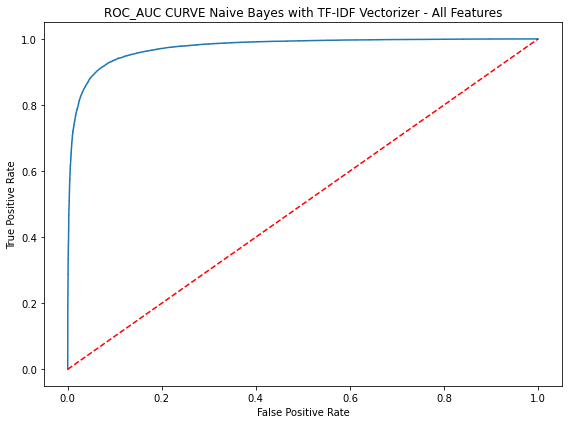

In [66]:
y_pred_proba4 = nb_tfidf.predict_proba(X_test4)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test4,  y_pred_proba4)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr4,tpr4)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Naive Bayes with TF-IDF Vectorizer - All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Naive Bayes with TF-IDF Vectorizer_All_Features.png')

# Random Forest - Count Vectorizor

In [67]:
from sklearn.ensemble import RandomForestClassifier
# the first model is using Count Vectorizor

In [68]:
vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(df['clean_text'].head(1000))
X = X.tocsc() 
y = df['class'].head(1000)

In [69]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.25, random_state=12)

In [70]:
'''
n_est = [int(n) for n in np.logspace(start=2.9, stop=4, num=5)]
depth = [int(x) for x in np.linspace(10, 100, num = 10)]
param_grid = {'n_estimators': n_est, 'max_depth' : depth}
rf1 = RandomForestClassifier(random_state = 1519)
rf_cv = GridSearchCV(rf1, param_grid, cv = 5)
rf_cv.fit(X_train5, y_train5)
'''

"\nn_est = [int(n) for n in np.logspace(start=2.9, stop=4, num=5)]\ndepth = [int(x) for x in np.linspace(10, 100, num = 10)]\nparam_grid = {'n_estimators': n_est, 'max_depth' : depth}\nrf1 = RandomForestClassifier(random_state = 1519)\nrf_cv = GridSearchCV(rf1, param_grid, cv = 5)\nrf_cv.fit(X_train5, y_train5)\n"

In [71]:
#print("Best Score:" + str(rf_cv.best_score_))
#print("Best Parameters: " + str(rf_cv.best_params_))

In [72]:
vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']

In [73]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.25, random_state=12)

In [74]:
rfcv = RandomForestClassifier(n_estimators = 794 , max_depth = 30)
rfcv.fit(X_train5, y_train5)

RandomForestClassifier(max_depth=30, n_estimators=794)

In [75]:
y_train_pred_rfcv = rfcv.predict(X_train5)
y_pred5 = rfcv.predict(X_test5)

In [76]:
training_accuracy_rfcv = rfcv.score(X_train5, y_train5)
test_accuracy_rfcv = rfcv.score(X_test5, y_pred5)

In [77]:
print("Accuracy on training data: {:2f}".format(training_accuracy_rfcv))
print("Accuracy on test data:     {:2f}".format(test_accuracy_rfcv))

Accuracy on training data: 0.880088
Accuracy on test data:     1.000000


In [78]:
from sklearn import tree, metrics
accuracy_rfcv = metrics.accuracy_score(y_test5,y_pred5)
balanced_accuracy_rfcv = metrics.balanced_accuracy_score(y_test5,y_pred5)
precision_rfcv = metrics.precision_score(y_test5,y_pred5, pos_label = 1)
recall_rfcv = metrics.recall_score(y_test5,y_pred5, pos_label = 1)
f1_rfcv = metrics.f1_score(y_test5, y_pred5, pos_label = 1)
roc_auc_rfcv = metrics.roc_auc_score(y_test5, y_pred5)
print("Accuracy:", accuracy_rfcv)
print("Balanced accuracy:", balanced_accuracy_rfcv)
print('Precision score' , precision_rfcv)
print('Recall score' , recall_rfcv)
print('F1 score' , f1_rfcv)
print('ROC_AUC Score' , roc_auc_rfcv)


Accuracy: 0.8531018909554755
Balanced accuracy: 0.853025611459403
Precision score 0.8973143145866532
Recall score 0.7970103911347395
F1 score 0.8441933596606698
ROC_AUC Score 0.8530256114594031


In [79]:
from sklearn.metrics import confusion_matrix
tn_rfcv, fp_rfcv, fn_rfcv, tp_rfcv = confusion_matrix(y_test5, y_pred5).ravel()
print(f'True Suicide: {tp_rfcv}')
print(f'False Suicide: {fp_rfcv}')
print(f'True Non-Suicide: {tn_rfcv}')
print(f'False Non-Suicide: {fn_rfcv}')

True Suicide: 23087
False Suicide: 2642
True Non-Suicide: 26404
False Non-Suicide: 5880


In [80]:
pd.DataFrame(confusion_matrix(y_test5, y_pred5), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,26404,2642
Actual Suicide,5880,23087


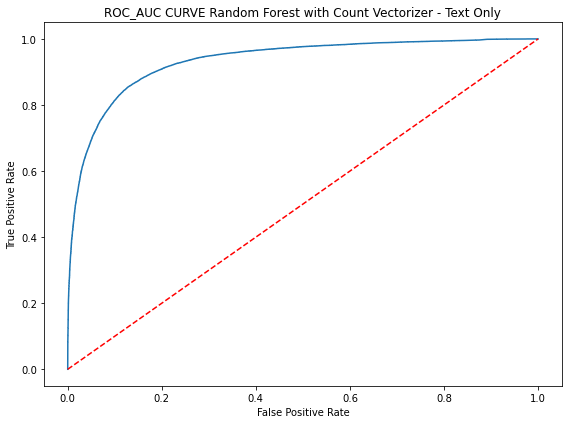

In [81]:
y_pred_proba5 = rfcv.predict_proba(X_test5)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test5,  y_pred_proba5)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr5,tpr5)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Random Forest with Count Vectorizer - Text Only")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Random Forest with Count Vectorizer TextOnly.png')

# Random Forest - Count Vectorizer All Features

In [82]:
from scipy.sparse import hstack
vectorizer = CountVectorizer(min_df=3)
text_matrix = vectorizer.fit_transform(df['clean_text'])
text_matrix = text_matrix.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X = hstack((third, sentiment))

y = df['class']

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2777764568.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'][:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2777764568.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'][:, None]


In [83]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.25, random_state=12)

In [84]:
from scipy.sparse import hstack
vectorizer = CountVectorizer(min_df=3)
text_matrix = vectorizer.fit_transform(df['clean_text'].head(1000))
text_matrix = text_matrix.tocsc() 
length = scaled_features_df['length'].head(1000).values[:, None]
sentiment = scaled_features_df['sentiment'].head(1000).values[:, None]
reading_level = scaled_features_df['flesch_kincaid'].head(1000)[:, None]
repetition = scaled_features_df['repetition'].head(1000)[:, None]
first = hstack((text_matrix, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X_param = hstack((third, sentiment))

y_param = df['class'].head(1000)

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/372702823.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'].head(1000)[:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/372702823.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'].head(1000)[:, None]


In [85]:
X_train_param, X_test_param, y_train_param, y_test_param = train_test_split(X_param, y_param, test_size=0.25, random_state=12)

In [86]:
'''
n_est = [int(n) for n in np.logspace(start=2.9, stop=4, num=5)]
depth = [int(x) for x in np.linspace(10, 100, num = 10)]
param_grid = {'n_estimators': n_est, 'max_depth' : depth}
rf1 = RandomForestClassifier(random_state = 1519)
rf_cv = GridSearchCV(rf1, param_grid, cv = 5)
rf_cv.fit(X_train_param, y_train_param)
'''

"\nn_est = [int(n) for n in np.logspace(start=2.9, stop=4, num=5)]\ndepth = [int(x) for x in np.linspace(10, 100, num = 10)]\nparam_grid = {'n_estimators': n_est, 'max_depth' : depth}\nrf1 = RandomForestClassifier(random_state = 1519)\nrf_cv = GridSearchCV(rf1, param_grid, cv = 5)\nrf_cv.fit(X_train_param, y_train_param)\n"

In [87]:
#print("Best Score:" + str(rf_cv.best_score_))
#print("Best Parameters: " + str(rf_cv.best_params_))

In [88]:
n_est

[0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5, 8]

In [89]:
rfcvi = RandomForestClassifier(n_estimators = 70 , max_depth = 1496)
rfcvi.fit(X_train6, y_train6)

RandomForestClassifier(max_depth=1496, n_estimators=70)

In [90]:
y_train_pred_rfcvi = rfcvi.predict(X_train6)
y_pred6 = rfcvi.predict(X_test6)

In [91]:
training_accuracy_rfcvi = rfcvi.score(X_train6, y_train6)
test_accuracy_rfcvi = rfcvi.score(X_test6, y_pred6)

In [92]:
print("Accuracy on training data: {:2f}".format(training_accuracy_rfcvi))
print("Accuracy on test data:     {:2f}".format(test_accuracy_rfcvi))

Accuracy on training data: 0.999885
Accuracy on test data:     1.000000


In [93]:
from sklearn import tree, metrics
accuracy_rfcvi = metrics.accuracy_score(y_test6,y_pred6)
balanced_accuracy_rfcvi = metrics.balanced_accuracy_score(y_test6,y_pred6)
precision_rfcvi = metrics.precision_score(y_test6,y_pred6, pos_label = 1)
recall_rfcvi = metrics.recall_score(y_test6,y_pred6, pos_label = 1)
f1_rfcvi = metrics.f1_score(y_test6, y_pred6, pos_label = 1)
roc_auc_rfcvi = metrics.roc_auc_score(y_test6, y_pred6)
print("Accuracy:", accuracy_rfcvi)
print("Balanced accuracy:", balanced_accuracy_rfcvi)
print('Precision score' , precision_rfcvi)
print('Recall score' , recall_rfcvi)
print('F1 score' , f1_rfcvi)
print('ROC_AUC Score' , roc_auc_rfcvi)


Accuracy: 0.8974712564425215
Balanced accuracy: 0.897496089029131
Precision score 0.8832284487064229
Recall score 0.9157316946870577
F1 score 0.899186440677966
ROC_AUC Score 0.897496089029131


In [94]:
from sklearn.metrics import confusion_matrix
tn_rfcvi, fp_rfcvi, fn_rfcvi, tp_rfcvi = confusion_matrix(y_test6, y_pred6).ravel()
print(f'True Suicide: {tp_rfcvi}')
print(f'False Suicide: {fp_rfcvi}')
print(f'True Non-Suicide: {tn_rfcvi}')
print(f'False Non-Suicide: {fn_rfcvi}')

True Suicide: 26526
False Suicide: 3507
True Non-Suicide: 25539
False Non-Suicide: 2441


In [95]:
pd.DataFrame(confusion_matrix(y_test6, y_pred6), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,25539,3507
Actual Suicide,2441,26526


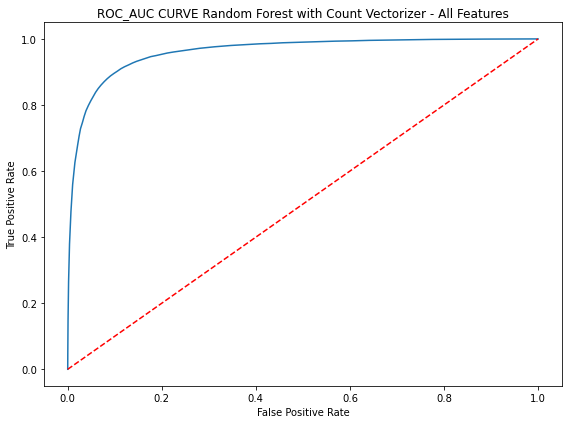

In [96]:
y_pred_proba6 = rfcvi.predict_proba(X_test6)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test6,  y_pred_proba6)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr6,tpr6)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Random Forest with Count Vectorizer - All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Random Forest with Count Vectorizer All Features.png')

# Random Forest - TF-IDF - Text Only

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
X_tfid1 = vectorizor_tfid.fit_transform(df['text'])
X_tfid1 = X_tfid1.tocsc() 
y_tfid1 = df['class']

In [98]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_tfid1, y_tfid1, test_size=0.25, random_state=12)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
X_params = vectorizor_tfid.fit_transform(df['text'].head(1000))
X_params = X_params.tocsc() 
y_params = df['class'].head(1000)

In [100]:
X_train_params7, X_test_params7, y_train_params7, y_test_params7 = train_test_split(X_params, y_params, test_size=0.25, random_state=12)

In [101]:
'''
n_est = [int(n) for n in np.logspace(start=2.2, stop=4, num=5)]
depth = [int(x) for x in np.linspace(20, 100, num = 7)]
param_grid = {'n_estimators': n_est, 'max_depth' : depth}
rf1 = RandomForestClassifier(random_state = 1519)
rf_cv = GridSearchCV(rf1, param_grid, cv = 5)
rf_cv.fit(X_train_params7, y_train_params7)
'''

"\nn_est = [int(n) for n in np.logspace(start=2.2, stop=4, num=5)]\ndepth = [int(x) for x in np.linspace(20, 100, num = 7)]\nparam_grid = {'n_estimators': n_est, 'max_depth' : depth}\nrf1 = RandomForestClassifier(random_state = 1519)\nrf_cv = GridSearchCV(rf1, param_grid, cv = 5)\nrf_cv.fit(X_train_params7, y_train_params7)\n"

In [102]:
#print("Best Score:" + str(rf_cv.best_score_))
#print("Best Parameters: " + str(rf_cv.best_params_))

In [103]:
rf_tfidf = RandomForestClassifier(max_depth = 60 , n_estimators = 1258)
rf_tfidf.fit(X_train7, y_train7)


RandomForestClassifier(max_depth=60, n_estimators=1258)

In [104]:
y_train_pred7 = rf_tfidf.predict(X_train7)
y_pred7 = rf_tfidf.predict(X_test7)

In [105]:
training_accuracy_rf_tfid = rf_tfidf.score(X_train7, y_train7)
test_accuracy_rf_tfid = rf_tfidf.score(X_test7, y_test7)

In [106]:
print("Accuracy on training data: {:2f}".format(training_accuracy_rf_tfid))
print("Accuracy on test data:     {:2f}".format(test_accuracy_rf_tfid))

Accuracy on training data: 0.940179
Accuracy on test data:     0.861117


In [107]:
from sklearn import tree, metrics

accuracy_rf_tfidf = metrics.accuracy_score(y_test7,y_pred7)
balanced_accuracy_rf_tfidf = metrics.balanced_accuracy_score(y_test7,y_pred7)
precision_rf_tfidf = metrics.precision_score(y_test7,y_pred7, pos_label = 1)
recall_rf_tfidf = metrics.recall_score(y_test7,y_pred7, pos_label = 1)
f1_rf_tfidf = metrics.f1_score(y_test7, y_pred7, pos_label = 1)
roc_auc_rf_tfidf = metrics.roc_auc_score(y_test7, y_pred7)
print("Accuracy:", accuracy_rf_tfidf)
print("Balanced accuracy:", balanced_accuracy_rf_tfidf)
print('Precision score' , precision_rf_tfidf)
print('Recall score' , recall_rf_tfidf)
print('F1 score' , f1_rf_tfidf)
print('ROC_AUC Score' , roc_auc_rf_tfidf)



Accuracy: 0.8611173357695688
Balanced accuracy: 0.8610693566656604
Precision score 0.8881710848741368
Recall score 0.8258362964752994
F1 score 0.8558701991019839
ROC_AUC Score 0.8610693566656605


In [108]:
from sklearn.metrics import confusion_matrix
tn_rf_tfid, fp_rf_tfid, fn_rf_tfid, tp_rf_tfid = confusion_matrix(y_test7, y_pred7).ravel()
print(f'True Suicide: {tp_rf_tfid}')
print(f'False Suicide: {fp_rf_tfid}')
print(f'True Non-Suicide: {tn_rf_tfid}')
print(f'False Non-Suicide: {fn_rf_tfid}')

True Suicide: 23922
False Suicide: 3012
True Non-Suicide: 26034
False Non-Suicide: 5045


In [109]:
pd.DataFrame(confusion_matrix(y_test7, y_pred7), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

,Predicted Non-Suicide,Predicted Suicide
Actual Non-Suicide,26034,3012
Actual Suicide,5045,23922


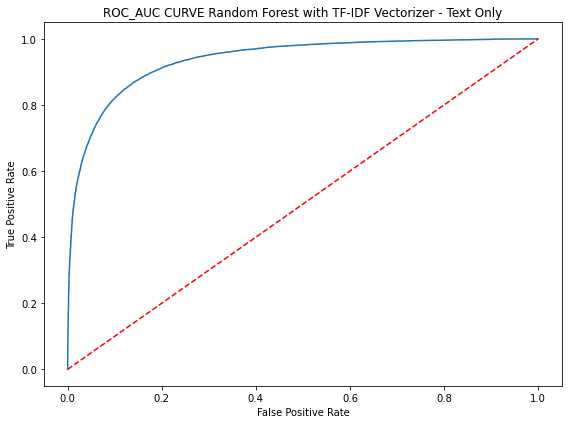

In [110]:
y_pred_proba7 = rf_tfidf.predict_proba(X_test7)[::,1]
fpr7, tpr7, _ = metrics.roc_curve(y_test7,  y_pred_proba7)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr7,tpr7)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Random Forest with TF-IDF Vectorizer - Text Only")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Random Forest with TF-IDF_text_only.png')

# Random Forest - TF-IDF All Features

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
text_matrix8 = vectorizor_tfid.fit_transform(df['text'])
text_matrix8 = text_matrix8.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix8, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X_tfid8 = hstack((third, sentiment))

y_tfid8 = df['class']

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/695355491.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'][:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/695355491.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'][:, None]


In [112]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_tfid8, y_tfid8, test_size=0.25, random_state=12)

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
text_matrix8 = vectorizor_tfid.fit_transform(df['text'].head(1000))
text_matrix8 = text_matrix8.tocsc() 
length = scaled_features_df['length'].head(1000).values[:, None]
sentiment = scaled_features_df['sentiment'].head(1000).values[:, None]
reading_level = scaled_features_df['flesch_kincaid'].head(1000)[:, None]
repetition = scaled_features_df['repetition'].head(1000)[:, None]
first = hstack((text_matrix8, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X_param8 = hstack((third, sentiment))

y_param8 = df['class'].head(1000)


C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2177902670.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reading_level = scaled_features_df['flesch_kincaid'].head(1000)[:, None]
C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_3544/2177902670.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  repetition = scaled_features_df['repetition'].head(1000)[:, None]


In [114]:
X_train_param8, X_test_param8, y_train_param8, y_test_param8 = train_test_split(X_param8, y_param8, test_size=0.25, random_state=12)

In [115]:
n_est = [int(n) for n in np.logspace(start=2.2, stop=4.5, num=5)]
depth = [int(x) for x in np.linspace(10, 100, num = 6)]
param_grid = {'n_estimators': n_est, 'max_depth' : depth}
rf1 = RandomForestClassifier(random_state = 1519)
rf_cv = GridSearchCV(rf1, param_grid, cv = 5)
rf_cv.fit(X_train_param8, y_train_param8)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1519),
             param_grid={'max_depth': [10, 28, 46, 64, 82, 100],
                         'n_estimators': [158, 595, 2238, 8413, 31622]})

In [116]:
n_est = [int(n) for n in np.logspace(start=2.2, stop=4.5, num=5)]
n_est

[158, 595, 2238, 8413, 31622]

In [117]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.8226666666666667
Best Parameters: {'max_depth': 64, 'n_estimators': 8413}


In [ ]:
rf_tfidfi = RandomForestClassifier(max_depth = 64, n_estimators = 8413)
rf_tfidfi.fit(X_train8, y_train8)

In [ ]:
y_train_pred8 = rf_tfidfi.predict(X_train8)
y_pred8 = rf_tfidfi.predict(X_test8)

In [ ]:
training_accuracy_rf_tfidi = rf_tfidfi.score(X_train8, y_train8)
test_accuracy_rf_tfidi = rf_tfidfi.score(X_test8, y_test8)

In [ ]:
print("Accuracy on training data: {:2f}".format(training_accuracy_rf_tfidi))
print("Accuracy on test data:     {:2f}".format(test_accuracy_rf_tfidi))

In [ ]:

accuracy_rf_tfidfi = metrics.accuracy_score(y_test8,y_pred8)
balanced_accuracy_rf_tfidfi = metrics.balanced_accuracy_score(y_test8,y_pred8)
precision_rf_tfidfi = metrics.precision_score(y_test8,y_pred8, pos_label = 1)
recall_rf_tfidfi = metrics.recall_score(y_test8,y_pred8, pos_label = 1)
f1_rf_tfidfi = metrics.f1_score(y_test8, y_pred8, pos_label = 1)
roc_auc_rf_tfidfi = metrics.roc_auc_score(y_tes8, y_pred8)
print("Accuracy:", accuracy_rf_tfidfi)
print("Balanced accuracy:", balanced_accuracy_rf_tfidfi)
print('Precision score' , precision_rf_tfidfi)
print('Recall score' , recall_rf_tfidfi)
print('F1 score' , f1_rf_tfidfi)
print('ROC_AUC Score' , roc_auc_rf_tfidfi)


In [ ]:
from sklearn.metrics import confusion_matrix
tn_rf_tfidi, fp_rf_tfidi, fn_rf_tfidi, tp_rf_tfidi = confusion_matrix(y_test8, y_pred8).ravel()
print(f'True Suicide: {tp_rf_tfidi}')
print(f'False Suicide: {fp_rf_tfidi}')
print(f'True Non-Suicide: {tn_rf_tfidi}')
print(f'False Non-Suicide: {fn_rf_tfidi}')

In [ ]:
pd.DataFrame(confusion_matrix(y_test8, y_pred8), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

In [ ]:
y_pred_proba8 = rf_tfidfi.predict_proba(X_test8)[::,1]
fpr8, tpr8, _ = metrics.roc_curve(y_test8,  y_pred_proba8)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr8,tpr8)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Random Forest with TF-IDF Vectorizer All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC Curve Random Forest with TF-IDF.ALL_Features.png')

# Logistic Regression - Count Vectorizer - Text Only

In [ ]:
vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']

In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train9, y_train9)

In [ ]:
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = {'penalty': penalty, 'C' : c_values}
lr = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
lr_cv.fit(X_train9, y_train9)

In [ ]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

In [ ]:
lr = LogisticRegression(C = 1.0, penalty = 'l2')
lr.fit(X_train9, y_train9)

In [ ]:
y_train_pred = lr.predict(X_train9)
y_pred = lr.predict(X_test9)

In [ ]:
training_accuracy_lrcv = lr.score(X_train9, y_train9)
test_accuracy_lrcv = lr.score(X_test9, y_test9)

In [ ]:
print("Accuracy on training data: {:2f}".format(training_accuracy_lrcv))
print("Accuracy on test data:     {:2f}".format(test_accuracy_lrcv))

In [ ]:
from sklearn import tree, metrics

accuracy_lrcv = metrics.accuracy_score(y_test9,y_pred9)
balanced_accuracy_lrcv = metrics.balanced_accuracy_score(y_test9,y_pred9)
precision_lrcv = metrics.precision_score(y_test9,y_pred9, pos_label = 1)
recall_lrcv = metrics.recall_score(y_test9,y_pred9, pos_label = 1)
f1_lrcv = metrics.f1_score(y_test9, y_pred9, pos_label = 1)
roc_auc_lrcv = metrics.roc_auc_score(y_test9, y_pred9)
print("Accuracy:", accuracy_lrcv)
print("Balanced accuracy:", balanced_accuracy_lrcv)
print('Precision score' , precision_lrcv)
print('Recall score' , recall_lrcv)
print('F1 score' , f1_lrcv)
print('ROC_AUC Score' , roc_auc_lrcv)


In [ ]:
from sklearn.metrics import confusion_matrix
tn_lrcv, fp_lrcv, fn_lrcv, tp_lrcv = confusion_matrix(y_test9, y_pred9).ravel()
print(f'True Suicide: {tp_lrcv}')
print(f'False Suicide: {fp_lrcv}')
print(f'True Non-Suicide: {tn_lrcv}')
print(f'False Non-Suicide: {fn_lrcv}')

In [ ]:
pd.DataFrame(confusion_matrix(y_test9, y_pred9), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

In [ ]:
y_pred_proba9 = lr.predict_proba9(X_test9)[::,1]
fpr9, tpr9, _ = metrics.roc_curve(y_test9,  y_pred_proba9)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr9,tpr9)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Logistic Regression with Count Vectorizer - Text Only")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC CURVE Logistic Regression with Count Vectorizer_TextOnly.png')

# Logistic Regression - Count Vectorizer - All Features

In [ ]:
from scipy.sparse import hstack
vectorizer = CountVectorizer(min_df=3)
text_matrix = vectorizer.fit_transform(df['clean_text'])
text_matrix = text_matrix.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X = hstack((third, sentiment))

y = df['class']

In [ ]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = {'penalty': penalty, 'C' : c_values}
lr = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
lr_cv.fit(X_train10, y_train10)

In [ ]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

In [ ]:
lrcvi = LogisticRegression(C = , penalty = 'l2')
lrcvi.fit(X_train9, y_train9)

In [ ]:
y_train_pred10 = lrcvi.predict(X_train10)
y_pred10 = lrcvi.predict(X_test10)

In [ ]:
training_accuracy_lrcvi = lr.score(X_train10, y_train10)
test_accuracy_lrcvi = lr.score(X_test10, y_test10)

In [ ]:
print("Accuracy on training data: {:2f}".format(training_accuracy_lrcvi))
print("Accuracy on test data:     {:2f}".format(test_accuracy_lrciv))

In [ ]:
accuracy_lrcvi = metrics.accuracy_score(y_test10,y_pred10)
balanced_accuracy_lrcvi = metrics.balanced_accuracy_score(y_test10,y_pred10)
precision_lrcvi = metrics.precision_score(y_test10,y_pred10, pos_label = 1)
recall_lrcvi = metrics.recall_score(y_test10,y_pred10, pos_label = 1)
f1_lrcvi = metrics.f1_score(y_test10, y_pred10, pos_label = 1)
roc_auc_lrcvi = metrics.roc_auc_score(y_test10, y_pred10)
print("Accuracy:", accuracy_lrcvi)
print("Balanced accuracy:", balanced_accuracy_lrcvi)
print('Precision score' , precision_lrcvi)
print('Recall score' , recall_lrcvi)
print('F1 score' , f1_lrcvi)
print('ROC_AUC Score' , roc_auc_lrcvi)


In [ ]:
from sklearn.metrics import confusion_matrix
tn_lrcvi, fp_lrcvi, fn_lrcvi, tp_lrcvi = confusion_matrix(y_test10, y_pred10).ravel()
print(f'True Suicide: {tp_lrcvi}')
print(f'False Suicide: {fp_lrcvi}')
print(f'True Non-Suicide: {tn_lrcvi}')
print(f'False Non-Suicide: {fn_lrcvi}')

In [ ]:
pd.DataFrame(confusion_matrix(y_test10, y_pred10), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

In [ ]:
y_pred_proba10 = lr.predict_proba9(X_test10)[::,1]
fpr10, tpr10, _ = metrics.roc_curve(y_test10,  y_pred_proba10)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr10,tpr10)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Logistic Regression with Count Vectorizer - All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC CURVE Logistic Regression with Count Vectorizer All Features.png')

# Logistic Regression - TF-IDF - Text Only

In [ ]:
vectorizor_tfid = TfidfVectorizer(min_df=0)
X = vectorizor_tfid.fit_transform(df['text'])
X_tfid11 = X.tocsc() 

y_tfid11 = df['class']

In [ ]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(X_tfid11, y_tfid11, test_size=0.25, random_state=12)

In [ ]:
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = {'penalty': penalty, 'C' : c_values}
lr_tfid = LogisticRegression(random_state = 0)
lr_tfid_cv = GridSearchCV(lr_tfid, param_grid, cv = 5)
lr_tfid_cv.fit(X_train11, y_train11)

In [ ]:
print("Best Score:" + str(lr_tfid_cv.best_score_))
print("Best Parameters: " + str(lr_tfid_cv.best_params_))

In [ ]:
lr_tfid = LogisticRegression(C = 10 , penalty = 'l2')
lr_tfid.fit(X_test11, y_test11)

In [ ]:
y_train_pred11 = lr_tfid.predict(X_train11)
y_pred11 = lr_tfid.predict(X_test11)

In [ ]:
training_accuracy = lr_tfid.score(X_train11, y_train11)
test_accuracy = lr_tfid.score(X_test11, y_test11)

In [ ]:
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

In [ ]:
accuracy_lr_tfidf = metrics.accuracy_score(y_test11,y_pred11)
balanced_accuracy_lr_tfidf = metrics.balanced_accuracy_score(y_test11,y_pred11)
precision_lr_tfidf = metrics.precision_score(y_test11,y_pred11, pos_label = 1)
recall_lr_tfidf = metrics.recall_score(y_test11,y_pred11, pos_label = 1)
f1_lr_tfidf = metrics.f1_score(y_test11, y_pred11, pos_label = 1)
roc_auc_lr_tfidf = metrics.roc_auc_score(y_test11, y_pred11)
print("Accuracy:", accuracy_lr_tfidf)
print("Balanced accuracy:", balanced_accuracy_lr_tfidf)
print('Precision score' , precision_lr_tfidf)
print('Recall score' , recall_lr_tfidf)
print('F1 score' , f1_lr_tfidf)
print('ROC_AUC Score' , roc_auc_lr_tfidf)



In [ ]:
from sklearn.metrics import confusion_matrix
tn_lr_tfid, fp_lr_tfid, fn_lr_tfid, tp_lr_tfid = confusion_matrix(y_test11, y_pred11).ravel()
print(f'True Suicide: {tp_lr_tfid}')
print(f'False Suicide: {fp_lr_tfid}')
print(f'True Non-Suicide: {tn_lr_tfid}')
print(f'False Non-Suicide: {fn_lr_tfid}')

In [ ]:
pd.DataFrame(confusion_matrix(y_test11, y_pred11), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

In [ ]:
y_pred_proba11 = lr_tfid.predict_proba(X_test11)[::,1]
fpr11, tpr11, _ = metrics.roc_curve(y_test11,  y_pred_proba11)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr11,tpr11)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Logistic Regression with TF-IDF Vectorizer - Text Only")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC CURVE Logistic Regression with TF-IDF Vectorizer_Text_Only.png')

# Logistic Regression - TF-IDF - All Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor_tfid = TfidfVectorizer(min_df=0)
text_matrix12 = vectorizor_tfid.fit_transform(df['text'])
text_matrix12 = text_matrix12.tocsc() 
length = scaled_features_df['length'].values[:, None]
sentiment = scaled_features_df['sentiment'].values[:, None]
reading_level = scaled_features_df['flesch_kincaid'][:, None]
repetition = scaled_features_df['repetition'][:, None]
first = hstack((text_matrix12, length))
second = hstack((first, sentiment))
third = hstack((second, reading_level))
X_tfid12 = hstack((third, sentiment))

y_tfid12 = df['class']

In [ ]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(X_tfid12, y_tfid12, test_size=0.25, random_state=12)

In [ ]:
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = {'penalty': penalty, 'C' : c_values}
lr_tfid = LogisticRegression(random_state = 0)
lr_tfid_cvi = GridSearchCV(lr_tfid, param_grid, cv = 5)
lr_tfid_cvi.fit(X_train12, y_train12)

In [ ]:
print("Best Score:" + str(lr_tfid_cvi.best_score_))
print("Best Parameters: " + str(lr_tfid_cvi.best_params_))

In [ ]:
lr_tfidi = LogisticRegression(C =  , penalty = '')
lr_tfidi.fit(X_test12, y_test12)

In [ ]:
y_train_pred12 = lr_tfidi.predict(X_train12)
y_pred12 = lr_tfidi.predict(X_test12)

In [ ]:
training_accuracy = lr_tfidi.score(X_train12, y_train12)
test_accuracy = lr_tfidi.score(X_test12, y_test12)

In [ ]:
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

In [ ]:
accuracy_lr_tfidfi = metrics.accuracy_score(y_test12,y_pred12)
balanced_accuracy_lr_tfidfi = metrics.balanced_accuracy_score(y_test12,y_pred12)
precision_lr_tfidfi = metrics.precision_score(y_test12,y_pred12, pos_label = 1)
recall_lr_tfidfi = metrics.recall_score(y_test12,y_pred12, pos_label = 1)
f1_lr_tfidfi = metrics.f1_score(y_test12, y_pred12, pos_label = 1)
roc_auc_lr_tfidfi = metrics.roc_auc_score(y_test12, y_pred12)
print("Accuracy:", accuracy_lr_tfidfi)
print("Balanced accuracy:", balanced_accuracy_lr_tfidfi)
print('Precision score' , precision_lr_tfidfi)
print('Recall score' , recall_lr_tfidfi)
print('F1 score' , f1_lr_tfidfi)
print('ROC_AUC Score' , roc_auc_lr_tfidfi)


In [ ]:
from sklearn.metrics import confusion_matrix
tn_lr_tfidi, fp_lr_tfidi, fn_lr_tfidi, tp_lr_tfidi = confusion_matrix(y_test12, y_pred12).ravel()
print(f'True Suicide: {tp_lr_tfidi}')
print(f'False Suicide: {fp_lr_tfidi}')
print(f'True Non-Suicide: {tn_lr_tfidi}')
print(f'False Non-Suicide: {fn_lr_tfidi}')

In [ ]:
pd.DataFrame(confusion_matrix(y_test12, y_pred12), columns=['Predicted Non-Suicide', "Predicted Suicide"], index=['Actual Non-Suicide', 'Actual Suicide'])

In [ ]:
y_pred_proba12 = lr_tfidi.predict_proba(X_test12)[::,1]
fpr12, tpr12, _ = metrics.roc_curve(y_test12,  y_pred_proba12)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr12,tpr12)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Logistic Regression with TF-IDF Vectorizer - All Features")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC_AUC CURVE Logistic Regression with TF-IDF Vectorizer_All_Features.png')

# Evaluate the models

In [ ]:
from tabulate import tabulate
d = [ ["Naive Bayes (Count Vectorizer - Text Only)",round(accuracy_nbcv, 3), round(precision_nbcv, 3), round(recall_nbcv, 3), round(f1_nbcv, 3), round(roc_auc_nbcv, 3)], 
     ["Naive Bayes (Count Vectorizer - All Features)",round(accuracy_nbcvi, 3), round(precision_nbcvi, 3), round(recall_nbcvi, 3), round(f1_nbcvi, 3), round(roc_auc_nbcvi, 3)], 
     
     ["Naive Bayes (TF-IDF - Text Only)",round(accuracy_nb_tfidf, 3), round(precision_nb_tfidf, 3), round(recall_nb_tfidf, 3), round(f1_nb_tfidf, 3), round(roc_auc_nb_tfidf, 3)],
    ["Naive Bayes (TF-IDF - All Features)",round(accuracy_nb_tfidfi, 3), round(precision_nb_tfidfi, 3), round(recall_nb_tfidfi, 3), round(f1_nb_tfidfi, 3), round(roc_auc_nb_tfidfi, 3)], ["", "", "" ,"", "", ""],
    ["Random Forest (Count Vectorizer - Text Only)",round(accuracy_rfcv, 3), round(precision_rfcv, 3), round(recall_rfcv, 3), round(f1_rfcv, 3), round(roc_auc_rfcv, 3)], 
    ["Random Forest (Count Vectorizer - All Features)",round(accuracy_rfcvi, 3), round(precision_rfcvi, 3), round(recall_rfcvi, 3), round(f1_rfcvi, 3), round(roc_auc_rfcvi, 3)], 
    ["Random Forest (TF-IDF - Text Only)",round(accuracy_rf_tfidf, 3), round(precision_rf_tfidf, 3), round(recall_rf_tfidf, 3), round(f1_rf_tfidf, 3), round(roc_auc_rf_tfidf, 3)], 
    ["Random Forest (TF-IDF - All Features)",round(accuracy_rf_tfidfi, 3), round(precision_rf_tfidfi, 3), round(recall_rf_tfidfi, 3), round(f1_rf_tfidfi, 3), round(roc_auc_rf_tfidfi, 3)], ["", "", "" ,"", "", ""],
    ["Logistic Regression (Count Vectorizer - Text Only)",round(accuracy_lrcv, 3), round(precision_lrcv, 3), round(recall_lrcv, 3), round(f1_lrcv, 3), round(roc_auc_lrcv, 3)], 
    ["Logistic Regression (Count Vectorizer - All Features)",round(accuracy_lrcvi, 3), round(precision_lrcvi, 3), round(recall_lrcvi, 3), round(f1_lrcvi, 3), round(roc_auc_lrcvi, 3)], 
    ["Logistic Regression (TF-IDF - Text Only)",round(accuracy_lr_tfidf, 3), round(precision_lr_tfidf, 3), round(recall_lr_tfidf, 3), round(f1_lr_tfidf, 3), round(roc_auc_lr_tfidf, 3)], 
    ["Logistic Regression (TF-IDF - All Features)",round(accuracy_lr_tfidfi, 3), round(precision_lr_tfidfi, 3), round(recall_lr_tfidfi, 3), round(f1_lr_tfidfi, 3), round(roc_auc_lr_tfidfi, 3)], ["", "", "" ,"", "", ""]]
print(" ")
print(" ")
datalist2 = tabulate(d, headers=["   Model  ", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC_AUC Score"])
print(datalist2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(fpr1, tpr1, lw=2, label='ROC - Naive Bayes (Count Vectorizer - Text Only)' + ' (area = %0.2f)' % roc_auc_nbcv)
plt.plot(fpr2, tpr2, lw=2, label='ROC - Naive Bayes (Count Vectorizer - All Features)' + ' (area = %0.2f)' % roc_auc_nbcvi)
plt.plot(fpr3, tpr3, lw=2, label='ROC - Naive Bayes (TF-IDF - Text Only)' + ' (area = %0.2f)' % roc_auc_nb_tfidf)
plt.plot(fpr4, tpr4, lw=2, label='ROC - Naive Bayes (TF-IDF - All Features)' + ' (area = %0.2f)' % roc_auc_nb_tfidfi)
plt.plot(fpr5, tpr5, lw=2, label='ROC - Random Forest (Count Vectorizer - Text Only)' + ' (area = %0.2f)' % roc_auc_rfcv)
plt.plot(fpr6, tpr6, lw=2, label='ROC - Random Forest (Count Vectorizer - All Features)' + ' (area = %0.2f)' % roc_auc_rfcvi)
plt.plot(fpr7, tpr7, lw=2, label='ROC - Random Forest (TF-IDF - Text Only)' + ' (area = %0.2f)' % roc_auc_rf_tfidf)
plt.plot(fpr8, tpr8, lw=2, label='ROC - Random Forest (TF-IDF - All Features)' + ' (area = %0.2f)' % roc_auc_rf_tfidfi)
plt.plot(fpr9, tpr9, lw=2, label='ROC - Logistic Regression (Count Vectorizer - Text Only)' + ' (area = %0.2f)' % roc_auc_lrcv)
plt.plot(fpr10, tpr10, lw=2, label='ROC - Logistic Regression (Count Vectorizer - All Features)' + ' (area = %0.2f)' % roc_auc_lrcvi)
plt.plot(fpr11, tpr11, lw=2, label='ROC - Logistic Regression (TF-IDF - Text Only)' + ' (area = %0.2f)' % roc_auc_lr_tfidf)
plt.plot(fpr12, tpr12, lw=2, label='ROC - Logistic Regression (TF-IDF - All Features)' + ' (area = %0.2f)' % roc_auc_lr_tfidfi)
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC CURVE Comparison of Various Models")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_AUC CURVE Model Comparison.png')

In [ ]:
d1 = [ ["Naive Bayes (Count Vectorizer - Text Only)",tp_nbcv, fp_nbcv, tn_nbcv, fn_nbcv], 
     ["Naive Bayes (Count Vectorizer - All Features)",tp_nbcvi, fp_nbcvi, tn_nbcvi, fn_nbcvi],      
     ["Naive Bayes (TF-IDF - Text Only)",tp_nb_tfidf, fp_nb_tfidf, tn_nb_tfidf, fn_nb_tfidf],
    ["Naive Bayes (TF-IDF - All Features)",tp_nb_tfidfi, fp_nb_tfidfi, tn_nb_tfidfi, fn_nb_tfidfi], ["", "", "" ,"", "", ""],
    ["Random Forest (Count Vectorizer - Text Only)",tp_rfcv, tn_rfcv, fp_rfcv, fn_rfcv], 
    ["Random Forest (Count Vectorizer - All Features)",tp_rfcvi, tn_rfcvi, tn_rfcvi, fn_rfcvi], 
    ["Random Forest (TF-IDF - Text Only)",tp_rf_tfid, fp_rf_tfid, tn_rf_tfid, fn_rf_tfid], 
    ["Random Forest (TF-IDF - All Features)",tp_rf_tfidi, fp_rf_tfidi, tn_rf_tfidi, fn_rf_tfidi], ["", "", "" ,"", "", ""],
    ["Logistic Regression (Count Vectorizer - Text Only)",tp_lrcv, fp_lrcv, tn_lrcv, fn_lrcv], 
    ["Logistic Regression (Count Vectorizer - All Features)",tp_lrcvi, fp_lrcvi, tn_lrcvi, fn_lrcvi], 
    ["Logistic Regression (TF-IDF - Text Only)",tp_lr_tfid, fp_lr_tfid, tn_lr_tfid, fn_lr_tfid], 
    ["Logistic Regression (TF-IDF - All Features)",tp_lr_tfidi, fp_lr_tfidi, tn_lr_tfidi, fn_lr_tfidi], ["", "", "" ,"", "", ""]]
print(" ")
print(" ")
datalist3 = tabulate(d1, headers=["   Model  ", "True Positive", "False Positive", "True Negative", "False Negative"])
print(datalist3)

# Look at Mis-Labeled Examples

In [ ]:
dict1 = {'predict_proba':lr_tfid.predict_proba(X_test_tfid)[:, 1], 'prediction' : lr_tfid.predict(X_test_tfid), 'actual' :y_test_tfid}

In [ ]:
df_preds = pd.DataFrame(dict1)

In [ ]:
df_preds['sum'] = df_preds['prediction'] + df_preds['actual']
mixed = df_preds[df_preds['sum'] == 1].reset_index()
mixed.head(10)

In [ ]:
mixed['string'] = ''

In [ ]:
for i in range(len(mixed)):
    mixed['string'].iloc[i] = df['text'].iloc[mixed['index'].iloc[i]]

In [ ]:
mixed.head(4)

In [ ]:
false_positive = mixed[mixed['prediction'] == 1]
false_negative = mixed[mixed['prediction'] == 0]

In [ ]:
false_positive.head()

In [ ]:
for i in range(0, 80):
    if i%3 == 0:
        print('iteration  ' , i , ' ', false_positive['string'].iloc[i])
        print('')

In [ ]:
false_negative.head()

In [ ]:
for i in range(0, 80):
    if i%3 == 0:
        print('iteration  ' , i , ' ', false_negative['string'].iloc[i])
        print('')

# Test Cases of New Text

# Everybody Hurts by REM

Is the classic song 'Everybody Hurts' about suicide?

In [ ]:
everybody_hurts ='when your day is long and the night the night is yours alone when you are sure you have had enough of this life well hang on do not let yourself go because everybody cries everybody hurts sometimes ometimes everything is wrong now its time to sing along when your day is night alone hold on hold on if you feel like letting go hold on if you think you have had too much of this life well hang on because everybody hurts take comfort in your friends everybody hurts do not throw your hand oh no do not throw your hand if you feel like you are alone no no no you are not alone if you are on your own in this life the days and nights are long when you think you have had too much of this life to hang on well everybody hurts sometimes everybody cries everybody hurts sometimes and everybody hurts sometimes so hold on hold on hold on hold on hold on hold on hold on hold on everybody hurts'

In [ ]:
eh = {'song': everybody_hurts}


In [ ]:
df_eh = pd.DataFrame(eh, index=[0])
df_eh['class'] = 0

In [ ]:
X_song = vectorizor_tfid.transform(df_eh['song'])
X_song = X_song.tocsc()  
y_song = df_eh['class']

In [ ]:
#clf.fit(XX)
lr_tfid.predict(X_song)

In [ ]:
lr_tfid.predict_proba(X_song)

   # Fire and Rain by James Taylor

This song is supposed to be about his friend who killed herself...what does the model say?

In [ ]:
fire_rain ='just yesterday morning they let me know you were gone suzanne the plans they made put an end to you i walked out this morning and i wrote down this song i just can not remember who to send it to i have seen fire and I have seen rain i have seen sunny days that i thought would never endi have seen lonely times when i could not find a friend but i always thought that i would see you again will you not look down upon me jesus you have got to help me make a stand you have just got to see me through another day my body is aching and my time is at hand and i will not make it any other way oh  i have seen fire and i have seen rain i have seen sunny days that i thought would never end i have seen lonely times when i could not find a friend but i always thought that i would see you again been walking my mind to an easy time my back turned towards the sun lord knows, when the cold wind blows it will turn your head around well there is hours of time on the telephone line to talk about things to come sweet dreams and flying machines in pieces on the ground oh i have seen fire and I have seen rain i  have seen sunny days that i thought would never end i have seen lonely times when i could not find a friend but i always thought that I would see you baby one more time again now thought i would see you one more time again there is just a few things coming my way this time around now thought i would see you thought I would see you fire and rain now'

In [ ]:
fr = {'song': fire_rain}

In [ ]:
df_fr = pd.DataFrame(fr, index=[0])
df_fr['class'] = 0

In [ ]:
X_song1 = vectorizor_tfid.transform(df_fr['song'])
X_song1 = X_song1.tocsc() 
y_song1 = df_fr['class']

In [ ]:
lr_tfid.predict(X_song1)

In [ ]:
lr_tfid.predict_proba(X_song1)

preliminary  model shows this song IS about suicide

# Happy and you know it

is this song about suicide?

In [ ]:
happy_know_it = 'if you are happy and you know it clap your hands if you are happy and you know it then your face will surely show it if you are happy and you know if clap your hands'

In [ ]:
hap = {'song': happy_know_it}

In [ ]:
df_hap = pd.DataFrame(hap, index=[0])
df_hap['class'] = 0

In [ ]:
X_songh = vectorizor_tfid.transform(df_hap['song'])
X_songh = X_songh.tocsc() 
y_songh = df_hap['class']

In [ ]:
lr_tfid.predict(X_songh)

In [ ]:
lr_tfid.predict_proba(X_songh)

# Wonderful World


In [ ]:
wonderful_world = 'i see trees of green red roses too i see them bloom for me and you and i think to myself what a wonderful world i see skies of blue and clouds of white the bright blessed day the dark sacred night and i think to myself what a wonderful world the colors of the rainbow so pretty in the sky are also on the faces of people going by i see friends shaking hands saying how do you do they are really saying i love you i hear babies crying i watch them grow they willl learn much more than i will ever know and i think to myself what a wonderful world yes i think to myself what a wonderful world ooh yes'

In [ ]:
ww = {'song': wonderful_world}

In [ ]:
df_ww = pd.DataFrame(ww, index=[0])
df_ww['class'] = 0

In [ ]:
X_song2 = vectorizor_tfid.transform(df_ww['song'])
X_song2 = X_song2.tocsc() 
y_song2 = df_ww['class']

In [ ]:
lr_tfid.predict(X_song2)

In [ ]:
lr_tfid.predict_proba(X_song2)

# Misidentified (Rickrolled)

In [ ]:
r_roll = 'we are no strangers to love you know the rules and so do i a full commitment is what i am thinking of you would not get this from any other guy i just wanna tell you how i am feeling gotta make you understand never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you we have known each other for so long your heart has been aching but you are too shy to say it inside we both know what has been going on we know the game and we are gonna play it and if you ask me how i am feeling do not tell me you are too blind to see never gonna give you up never gonna let you down  never gonna run around and desert you never gonna make you cry never gonna say goodbye  never gonna tell a lie and hurt you never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you we have known each other for so long your heart has been aching but you are too shy to say it inside we both know what has been going on we know the game and we are gonna play it i just wanna tell you how i am feeling gotta make you understand never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you '

In [ ]:
rroll = {'song': r_roll}

In [ ]:
df_rroll = pd.DataFrame(rroll, index=[0])
df_rroll['class'] = 0

In [ ]:
X_songrr = vectorizor_tfid.transform(df_rroll['song'])
X_songrr = X_songrr.tocsc() 
y_songrr = df_rroll['class']

In [ ]:
lr_tfid.predict(X_songrr)

In [ ]:
lr_tfid.predict_proba(X_songrr)